## Lab | Customer Analysis Round 7

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise. Some approaches you can try in this exercise:

use the concept of multicollinearity and remove insignificant variables
use a different method of scaling the numerical variables
use a different ratio of train test split
use the transformation on numerical columns which align it more towards a normal distribution
Get the data

* We are using the marketing_customer_analysis.csv file.

* Dealing with the data

* Already done in rounds 2 to 7.

* Bonus: Build a function, from round 2 and round 7, to clean and process the data.

* Explore the data

* Done in the round 3.

* Modeling

* Description:

* Try to improve the linear regression model.

### Import what is needed

In [115]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Get the Data

In [116]:
data = pd.read_csv('/Users/patrickhutsch/IH-Labs/lab-customer-analysis-round-6/files_for_lab/csv_files/marketing_customer_analysis.csv')

In [117]:
data = data.set_index("Customer")

In [118]:
data.columns = data.columns.str.replace(' ','_').str.lower()

In [119]:
data.head()

state  customer_lifetime_value response  coverage education  \
Customer                                                                     
BU79786   Washington              2763.519279       No     Basic  Bachelor   
QZ44356      Arizona              6979.535903       No  Extended  Bachelor   
AI49188       Nevada             12887.431650       No   Premium  Bachelor   
WW63253   California              7645.861827       No     Basic  Bachelor   
HB64268   Washington              2813.692575       No     Basic  Bachelor   

         effective_to_date employmentstatus gender  income location_code  ...  \
Customer                                                                  ...   
BU79786            2/24/11         Employed      F   56274      Suburban  ...   
QZ44356            1/31/11       Unemployed      F       0      Suburban  ...   
AI49188            2/19/11         Employed      F   48767      Suburban  ...   
WW63253            1/20/11       Unemployed      M       0      Suburban  ...   
HB64268             2/3/11         Employed      M   43836         Rural  ...   

         months_since_policy_inception  number_of_open_complaints  \
Customer                                                            
BU79786                              5                          0   
QZ44356                             42                          0   
AI49188                             38                          0   
WW63253                             65                          0   
HB64268                             44                          0   

          number_of_policies     policy_type        policy  renew_offer_type  \
Customer                                                                       
BU79786                    1  Corporate Auto  Corporate L3            Offer1   
QZ44356                    8   Personal Auto   Personal L3            Offer3   
AI49188                    2   Personal Auto   Personal L3            Offer1   
WW63253                    7  Corporate Auto  Corporate L2            Offer1   
HB64268                    1   Personal Auto   Personal L1            Offer1   

         sales_channel total_claim_amount  vehicle_class vehicle_size  
Customer                                                               
BU79786          Agent         384.811147   Two-Door Car      Medsize  
QZ44356          Agent        1131.464935  Four-Door Car      Medsize  
AI49188          Agent         566.472247   Two-Door Car      Medsize  
WW63253    Call Center         529.881344            SUV      Medsize  
HB64268          Agent         138.130879  Four-Door Car      Medsize  

[5 rows x 23 columns]

In [120]:
data.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [121]:
data.describe()

customer_lifetime_value        income  monthly_premium_auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       months_since_last_claim  months_since_policy_inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       number_of_open_complaints  number_of_policies  total_claim_amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

In [122]:
num_T = data.describe().T

In [123]:
num_T.head()

count          mean           std  \
customer_lifetime_value        9134.0   8004.940475   6870.967608   
income                         9134.0  37657.380009  30379.904734   
monthly_premium_auto           9134.0     93.219291     34.407967   
months_since_last_claim        9134.0     15.097000     10.073257   
months_since_policy_inception  9134.0     48.064594     27.905991   

                                       min          25%           50%  \
customer_lifetime_value        1898.007675  3994.251794   5780.182197   
income                            0.000000     0.000000  33889.500000   
monthly_premium_auto             61.000000    68.000000     83.000000   
months_since_last_claim           0.000000     6.000000     14.000000   
months_since_policy_inception     0.000000    24.000000     48.000000   

                                        75%          max  
customer_lifetime_value         8962.167041  83325.38119  
income                         62320.000000  99981.00000  
monthly_premium_auto             109.000000    298.00000  
months_since_last_claim           23.000000     35.00000  
months_since_policy_inception     71.000000     99.00000

In [124]:
data = data.drop_duplicates()
data.shape

(8971, 23)

In [125]:
num = data.select_dtypes(np.number)
cat = data.select_dtypes(np.object)

/var/folders/01/5g33_gtn6zz6mqzd8m_9ngxw0000gn/T/ipykernel_87073/3947286052.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat = data.select_dtypes(np.object)


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8971 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          8971 non-null   object 
 1   customer_lifetime_value        8971 non-null   float64
 2   response                       8971 non-null   object 
 3   coverage                       8971 non-null   object 
 4   education                      8971 non-null   object 
 5   effective_to_date              8971 non-null   object 
 6   employmentstatus               8971 non-null   object 
 7   gender                         8971 non-null   object 
 8   income                         8971 non-null   int64  
 9   location_code                  8971 non-null   object 
 10  marital_status                 8971 non-null   object 
 11  monthly_premium_auto           8971 non-null   int64  
 12  months_since_last_claim        8971 non-null

In [127]:
data.isin([0]).sum()

state                               0
customer_lifetime_value             0
response                            0
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                           2296
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           312
months_since_policy_inception      80
number_of_open_complaints        7114
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                       0
vehicle_size                        0
dtype: int64

### Plotting

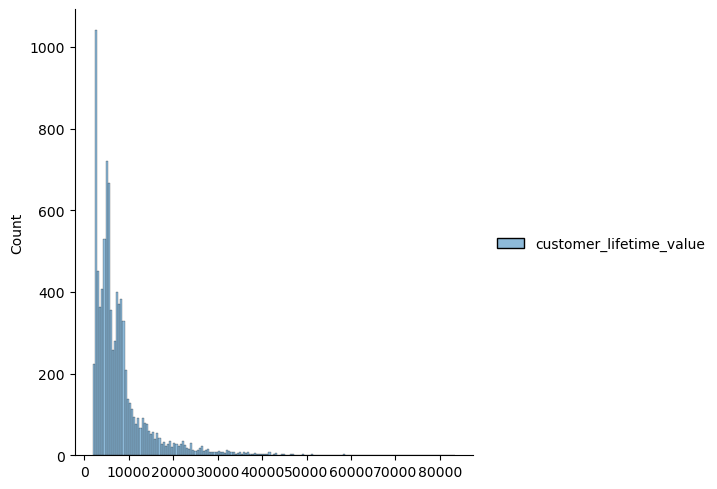

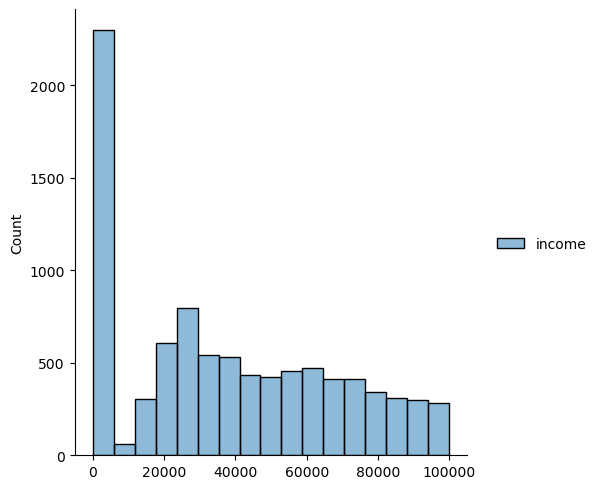

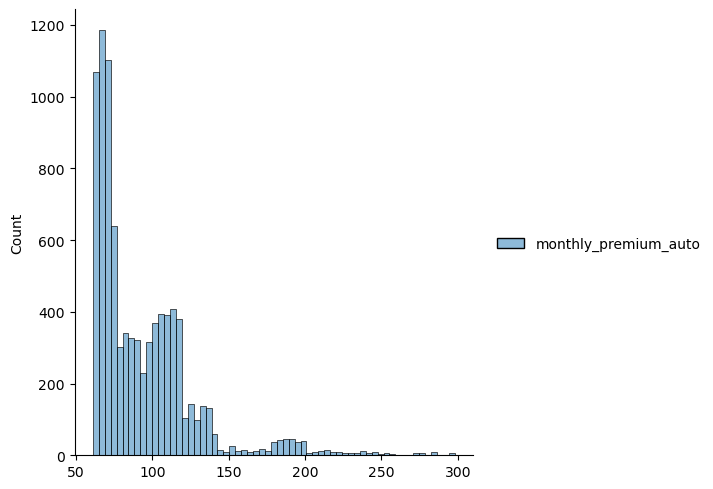

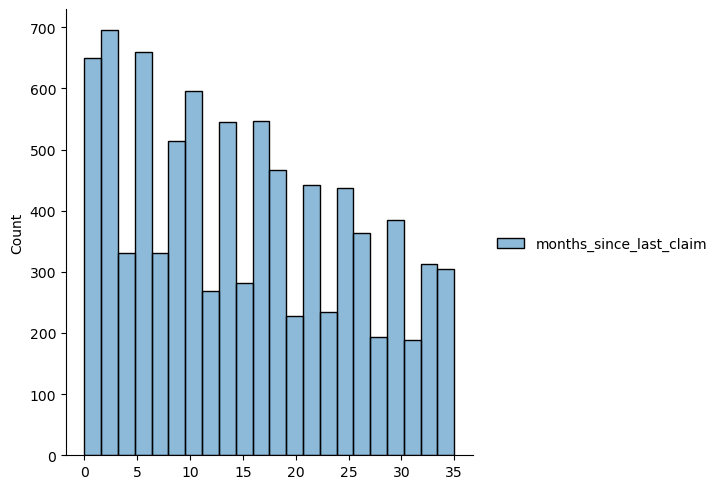

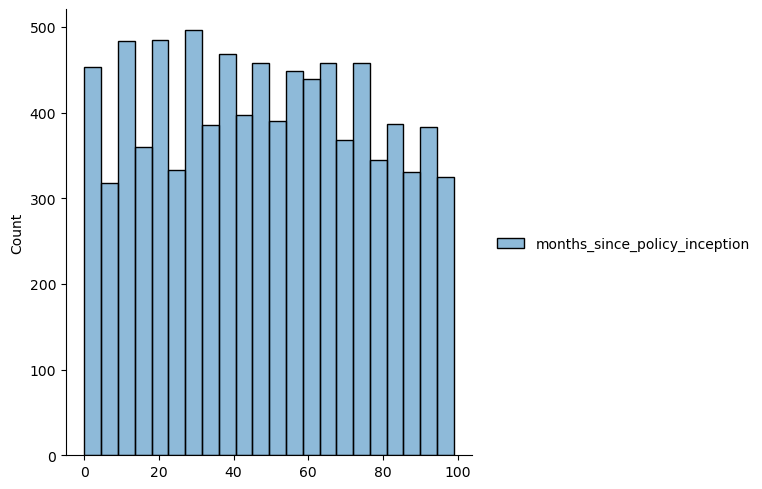

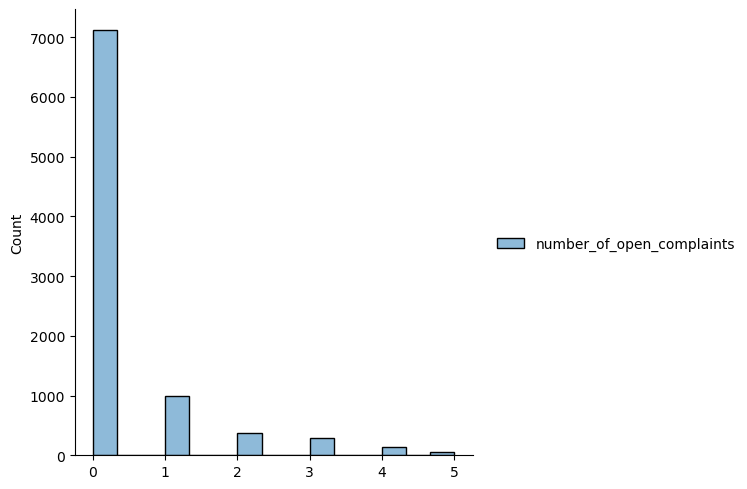

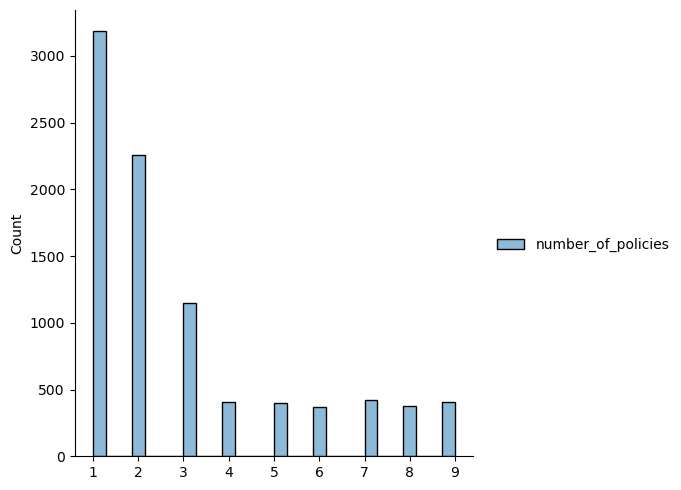

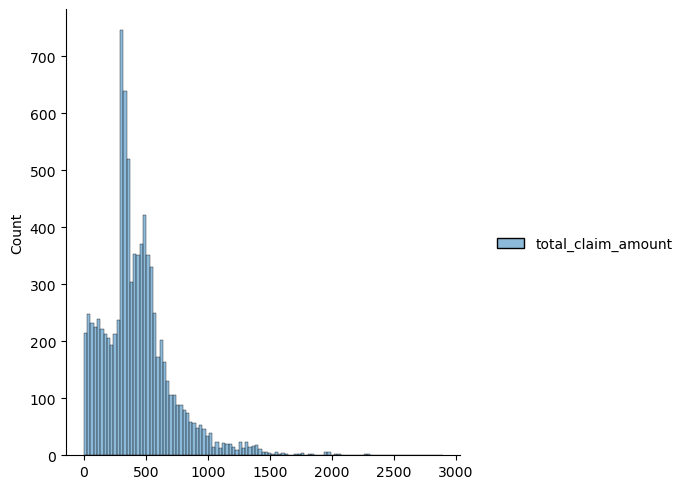

In [128]:
num_col = list(num.columns)

for i in num_col:
    sns.displot([num[i]])

### Correlations check

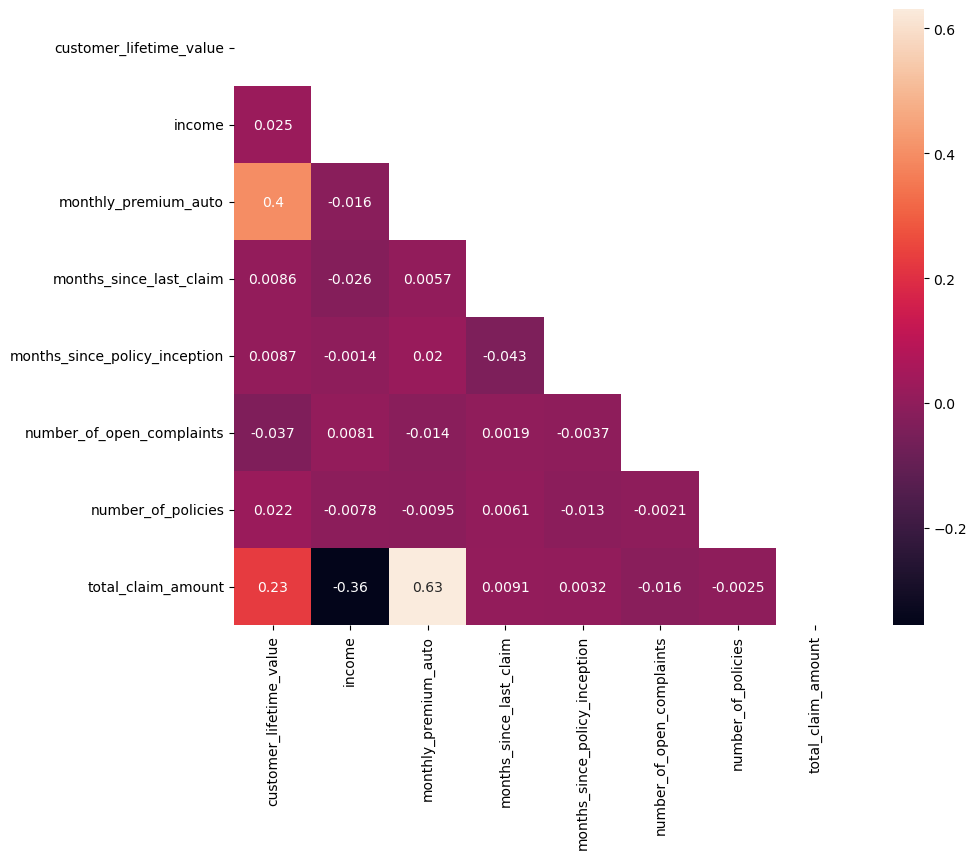

In [129]:
correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [130]:
num_drop1 = num.drop(['customer_lifetime_value'], axis=1)

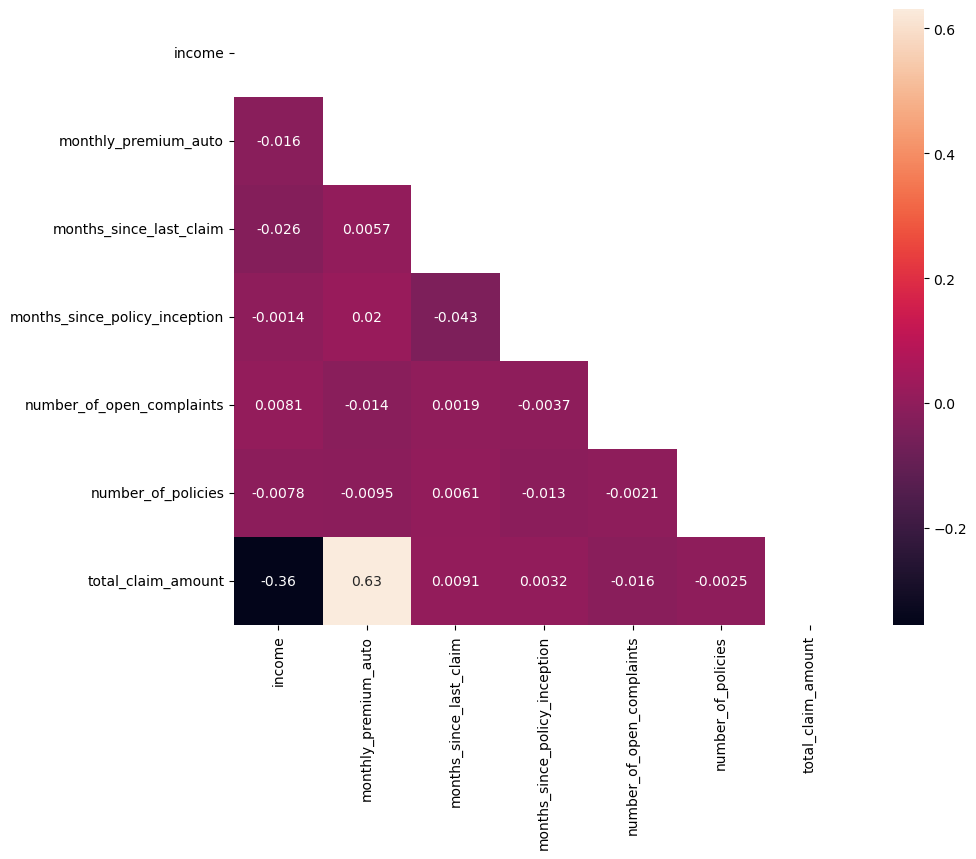

In [131]:
correlations_matrix = num_drop1.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [132]:
num_drop2 = num_drop1.drop(['income'], axis=1)

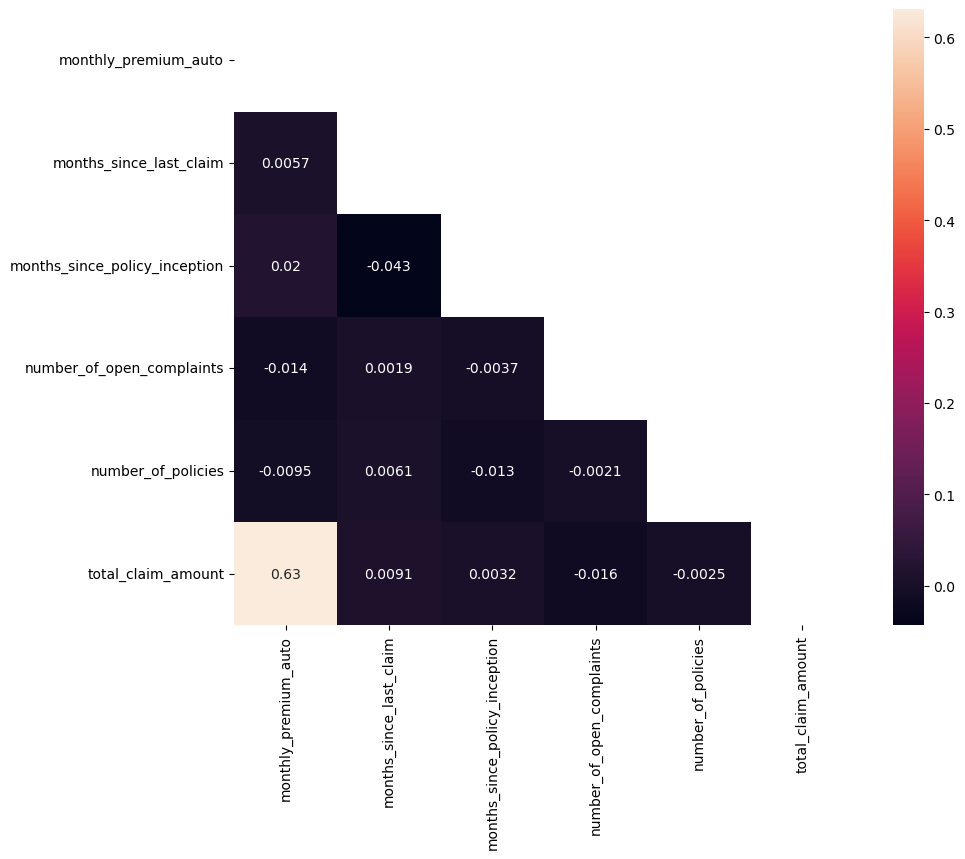

In [133]:
correlations_matrix = num_drop2.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [134]:
data['effective_to_date'].unique()

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

In [135]:
cat.drop(['effective_to_date'], axis=1, inplace=True)

In [136]:
cat.head()

state response  coverage education employmentstatus gender  \
Customer                                                                    
BU79786   Washington       No     Basic  Bachelor         Employed      F   
QZ44356      Arizona       No  Extended  Bachelor       Unemployed      F   
AI49188       Nevada       No   Premium  Bachelor         Employed      F   
WW63253   California       No     Basic  Bachelor       Unemployed      M   
HB64268   Washington       No     Basic  Bachelor         Employed      M   

         location_code marital_status     policy_type        policy  \
Customer                                                              
BU79786       Suburban        Married  Corporate Auto  Corporate L3   
QZ44356       Suburban         Single   Personal Auto   Personal L3   
AI49188       Suburban        Married   Personal Auto   Personal L3   
WW63253       Suburban        Married  Corporate Auto  Corporate L2   
HB64268          Rural         Single   Personal Auto   Personal L1   

         renew_offer_type sales_channel  vehicle_class vehicle_size  
Customer                                                             
BU79786            Offer1         Agent   Two-Door Car      Medsize  
QZ44356            Offer3         Agent  Four-Door Car      Medsize  
AI49188            Offer1         Agent   Two-Door Car      Medsize  
WW63253            Offer1   Call Center            SUV      Medsize  
HB64268            Offer1         Agent  Four-Door Car      Medsize

In [137]:
ordi=pd.DataFrame(columns=["coverage", "education", "employmentstatus", "vehicle_class", "vehicle_size"],data=cat)
ordi.head()

coverage education employmentstatus  vehicle_class vehicle_size
Customer                                                                 
BU79786      Basic  Bachelor         Employed   Two-Door Car      Medsize
QZ44356   Extended  Bachelor       Unemployed  Four-Door Car      Medsize
AI49188    Premium  Bachelor         Employed   Two-Door Car      Medsize
WW63253      Basic  Bachelor       Unemployed            SUV      Medsize
HB64268      Basic  Bachelor         Employed  Four-Door Car      Medsize

In [138]:
def boxplot_ordinals(ordinal, target):
    df = pd.DataFrame(data= [cat[ordinal], data[target]])
    df = df.T
    sns.boxplot(x=ordinal, y=target, data=df)
    plt.show()
    return plt.show()

coverage


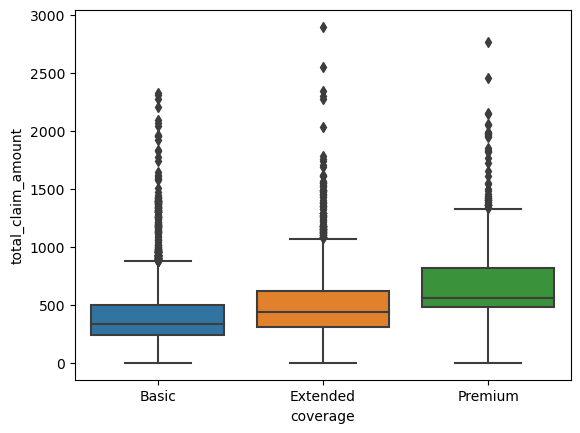

education


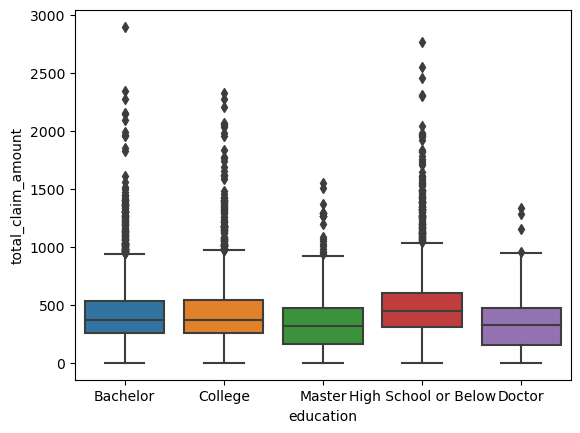

employmentstatus


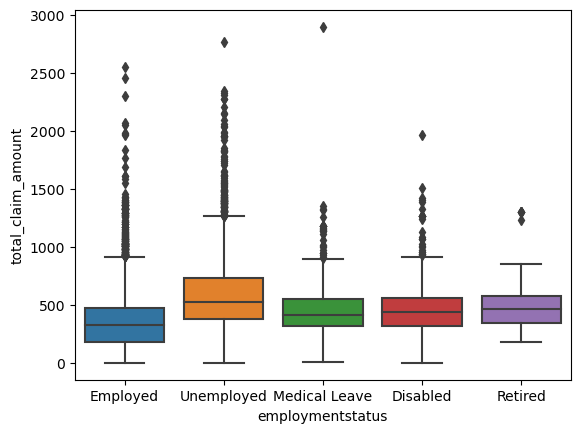

vehicle_class


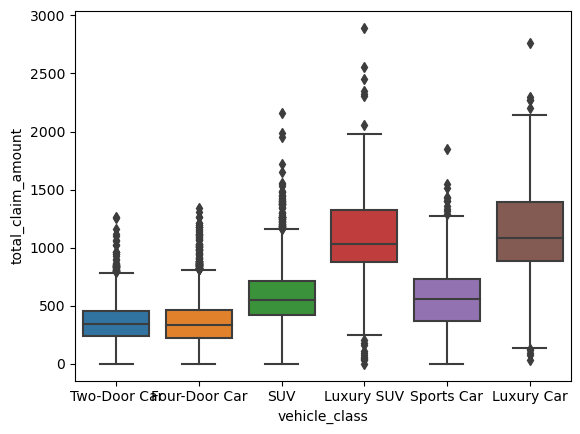

vehicle_size


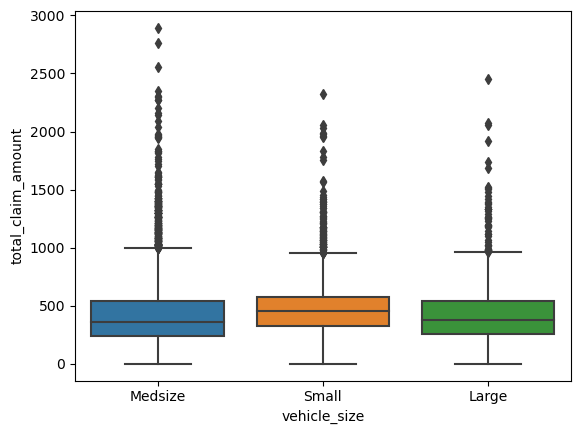

In [139]:
for i in list(ordi.columns):
    print(i)
    boxplot_ordinals(i, 'total_claim_amount')

In [140]:
ordi.drop('EmploymentStatus', axis=1, inplace=True)

KeyError: "['EmploymentStatus'] not found in axis"

In [141]:
coverage_dict = {'Basic':0,'Extended':1,'Premium':2}
ordi['coverage'] = ordi['coverage'].map(coverage_dict)
education_dict = {'High School or Below': 0, 'College':1, 'Bachelor':2,'Master':3,'Doctor':4}
ordi['education'] = ordi['education'].map(education_dict)
vehicle_class_dict = {'Two-Door Car':0, 'Four-Door Car':0, 'SUV':1, 'Luxury SUV':2, 'Sports Car':1,'Luxury Car':2}
ordi['vehicle_class'] = ordi['vehicle_class'].map(vehicle_class_dict)
vehicle_dict = {'Small':0,'Medsize':1,'Large':2 }
ordi['vehicle_size'] = ordi['vehicle_size'].map(vehicle_dict)

In [142]:
ordi.head()

coverage  education employmentstatus  vehicle_class  vehicle_size
Customer                                                                   
BU79786          0          2         Employed              0             1
QZ44356          1          2       Unemployed              0             1
AI49188          2          2         Employed              0             1
WW63253          0          2       Unemployed              1             1
HB64268          0          2         Employed              0             1

In [143]:
cat.drop(list(ordi.columns), axis=1, inplace=True)

In [144]:
cat.head()

state response gender location_code marital_status  \
Customer                                                            
BU79786   Washington       No      F      Suburban        Married   
QZ44356      Arizona       No      F      Suburban         Single   
AI49188       Nevada       No      F      Suburban        Married   
WW63253   California       No      M      Suburban        Married   
HB64268   Washington       No      M         Rural         Single   

             policy_type        policy renew_offer_type sales_channel  
Customer                                                               
BU79786   Corporate Auto  Corporate L3           Offer1         Agent  
QZ44356    Personal Auto   Personal L3           Offer3         Agent  
AI49188    Personal Auto   Personal L3           Offer1         Agent  
WW63253   Corporate Auto  Corporate L2           Offer1   Call Center  
HB64268    Personal Auto   Personal L1           Offer1         Agent

In [145]:
num = pd.concat([num, ordi], axis=1)

In [146]:
num.head()

customer_lifetime_value  income  monthly_premium_auto  \
Customer                                                          
BU79786               2763.519279   56274                    69   
QZ44356               6979.535903       0                    94   
AI49188              12887.431650   48767                   108   
WW63253               7645.861827       0                   106   
HB64268               2813.692575   43836                    73   

          months_since_last_claim  months_since_policy_inception  \
Customer                                                           
BU79786                        32                              5   
QZ44356                        13                             42   
AI49188                        18                             38   
WW63253                        18                             65   
HB64268                        12                             44   

          number_of_open_complaints  number_of_policies  total_claim_amount  \
Customer                                                                      
BU79786                           0                   1          384.811147   
QZ44356                           0                   8         1131.464935   
AI49188                           0                   2          566.472247   
WW63253                           0                   7          529.881344   
HB64268                           0                   1          138.130879   

          coverage  education employmentstatus  vehicle_class  vehicle_size  
Customer                                                                     
BU79786          0          2         Employed              0             1  
QZ44356          1          2       Unemployed              0             1  
AI49188          2          2         Employed              0             1  
WW63253          0          2       Unemployed              1             1  
HB64268          0          2         Employed              0             1

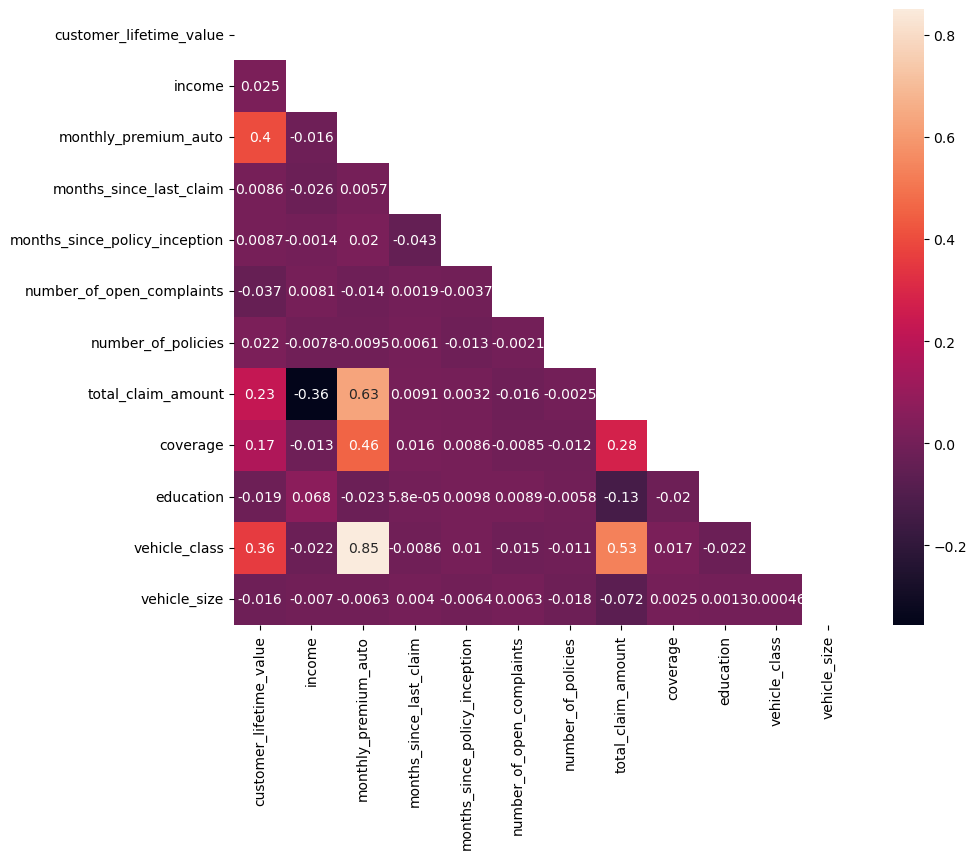

In [147]:
correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

### X y Split

In [148]:
Y = num['total_claim_amount']
num_X = num.drop(['total_claim_amount'], axis = 1)

In [149]:
num_X.head()

customer_lifetime_value  income  monthly_premium_auto  \
Customer                                                          
BU79786               2763.519279   56274                    69   
QZ44356               6979.535903       0                    94   
AI49188              12887.431650   48767                   108   
WW63253               7645.861827       0                   106   
HB64268               2813.692575   43836                    73   

          months_since_last_claim  months_since_policy_inception  \
Customer                                                           
BU79786                        32                              5   
QZ44356                        13                             42   
AI49188                        18                             38   
WW63253                        18                             65   
HB64268                        12                             44   

          number_of_open_complaints  number_of_policies  coverage  education  \
Customer                                                                       
BU79786                           0                   1         0          2   
QZ44356                           0                   8         1          2   
AI49188                           0                   2         2          2   
WW63253                           0                   7         0          2   
HB64268                           0                   1         0          2   

         employmentstatus  vehicle_class  vehicle_size  
Customer                                                
BU79786          Employed              0             1  
QZ44356        Unemployed              0             1  
AI49188          Employed              0             1  
WW63253        Unemployed              1             1  
HB64268          Employed              0             1

In [150]:
from sklearn.preprocessing import OneHotEncoder

In [151]:
df_index = cat.index
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(cat) 

print("Values may be: ",encoder.categories_)

encoded = encoder.transform(cat).toarray()
encoded

Values may be:  [array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object)]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [152]:
encoding_columns = encoder.get_feature_names()
print(encoding_columns)

['x0_California' 'x0_Nevada' 'x0_Oregon' 'x0_Washington' 'x1_Yes' 'x2_M'
 'x3_Suburban' 'x3_Urban' 'x4_Married' 'x4_Single' 'x5_Personal Auto'
 'x5_Special Auto' 'x6_Corporate L2' 'x6_Corporate L3' 'x6_Personal L1'
 'x6_Personal L2' 'x6_Personal L3' 'x6_Special L1' 'x6_Special L2'
 'x6_Special L3' 'x7_Offer2' 'x7_Offer3' 'x7_Offer4' 'x8_Branch'
 'x8_Call Center' 'x8_Web']


/Users/patrickhutsch/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [153]:
cat_encoded = pd.DataFrame(data=encoded, columns=encoding_columns, index = df_index)
cat_encoded.head()

x0_California  x0_Nevada  x0_Oregon  x0_Washington  x1_Yes  x2_M  \
Customer                                                                     
BU79786             0.0        0.0        0.0            1.0     0.0   0.0   
QZ44356             0.0        0.0        0.0            0.0     0.0   0.0   
AI49188             0.0        1.0        0.0            0.0     0.0   0.0   
WW63253             1.0        0.0        0.0            0.0     0.0   1.0   
HB64268             0.0        0.0        0.0            1.0     0.0   1.0   

          x3_Suburban  x3_Urban  x4_Married  x4_Single  ...  x6_Personal L3  \
Customer                                                ...                   
BU79786           1.0       0.0         1.0        0.0  ...             0.0   
QZ44356           1.0       0.0         0.0        1.0  ...             1.0   
AI49188           1.0       0.0         1.0        0.0  ...             1.0   
WW63253           1.0       0.0         1.0        0.0  ...             0.0   
HB64268           0.0       0.0         0.0        1.0  ...             0.0   

          x6_Special L1  x6_Special L2  x6_Special L3  x7_Offer2  x7_Offer3  \
Customer                                                                      
BU79786             0.0            0.0            0.0        0.0        0.0   
QZ44356             0.0            0.0            0.0        0.0        1.0   
AI49188             0.0            0.0            0.0        0.0        0.0   
WW63253             0.0            0.0            0.0        0.0        0.0   
HB64268             0.0            0.0            0.0        0.0        0.0   

          x7_Offer4  x8_Branch  x8_Call Center  x8_Web  
Customer                                                
BU79786         0.0        0.0             0.0     0.0  
QZ44356         0.0        0.0             0.0     0.0  
AI49188         0.0        0.0             0.0     0.0  
WW63253         0.0        0.0             1.0     0.0  
HB64268         0.0        0.0             0.0     0.0  

[5 rows x 26 columns]

In [154]:
X = pd.concat([num_X, cat_encoded], axis=1)
df_index = X.index
X.shape

(8971, 38)

In [155]:
Y_df = pd.DataFrame(Y)
Y_df

total_claim_amount
Customer                    
BU79786           384.811147
QZ44356          1131.464935
AI49188           566.472247
WW63253           529.881344
HB64268           138.130879
...                      ...
YM19146           541.282007
LA72316           198.234764
TD14365           790.784983
UP19263           691.200000
Y167826           369.600000

[8971 rows x 1 columns]

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [158]:
X_train.shape

(6279, 38)

In [159]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [160]:
x_transformer = StandardScaler().fit(X_train)

x_train_transformed = pd.DataFrame(x_transformer.transform(X_train), columns = X.columns)
x_test_transformed = pd.DataFrame(x_transformer.transform(X_test), columns = X.columns)

ValueError: could not convert string to float: 'Employed'

In [161]:
x_train_transformed.index = X_train.index

In [162]:
x_test_transformed.index = X_test.index

In [163]:
from sklearn import linear_model

In [164]:
lm = linear_model.LinearRegression()

model = lm.fit(x_train_transformed,y_train)

In [165]:
predictions  = lm.predict(x_test_transformed)
predictions_df = pd.DataFrame(predictions, columns = Y_df.columns, index = x_test_transformed.index)
predictions_df.head()

total_claim_amount
Customer                    
DQ10761           548.639741
MQ93707           393.583555
DS50601           413.509473
AP95078           362.039067
CW38361           202.744447

In [166]:
from sklearn.metrics import mean_squared_error, r2_score

In [167]:
r2 = r2_score(y_test, predictions)
print("The R2 of the linear model is: ",round(r2_score(y_test, predictions),5))

The R2 of the linear model is:  0.78234


## N = len(X_test)
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(N-1)/(N-p-1))
print("The adjusted R2 value on the TEST set is: ",round(adj_r2,5))

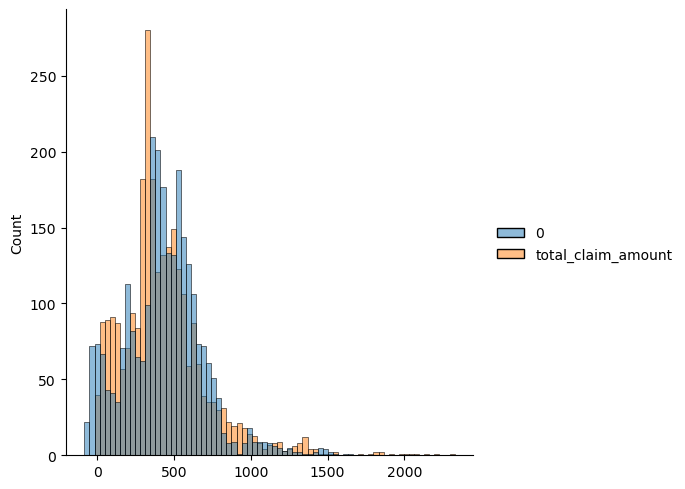

In [168]:
sns.displot([predictions,y_test])
plt.show()